# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [123]:
# Import warnings
import warnings
warnings.filterwarnings('ignore')


In [124]:
import warnings
warnings.filterwarnings('ignore')

In [125]:
# Import the libraries you will be using for analysis

import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns




pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

print("Libraries imported successfully.")

Libraries imported successfully.


In [126]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.24.3
pandas version: 2.0.3
matplotlib version: 3.7.2
seaborn version: 0.12.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [130]:
# Try loading one file

# df = pd.read_parquet('2023-1.parquet')
# df.info()
df = pd.read_parquet("/Users/nashratjahan/Desktop/PythonBasics/Datasets and Dictionary/trip_records/2023-1.parquet")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

In [ ]:
combined_sampled_data = pd.DataFrame()

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
import os
data_dir = "/Users/nashratjahan/Desktop/PythonBasics/Datasets and Dictionary/trip_records"

# Get all parquet files in the folder
files = [f for f in os.listdir(data_dir) if f.endswith(".parquet")]
print("Files found:", files)

# Empty DataFrame to store all sampled data
combined_sampled_data = pd.DataFrame()

# Loop through each file
for file_name in files:
    file_path = os.path.join(data_dir, file_name)
    print(f"Processing file: {file_path}")
    
    # Load parquet file
    df = pd.read_parquet(file_path)
    
    # Extract date and hour from pickup datetime
    df['pickup_date'] = df['tpep_pickup_datetime'].dt.date
    df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

    # Temporary DataFrame for this file’s sampled data
    sampled_data = pd.DataFrame()

    # Sample 5% from each hour of each date
    for date in df['pickup_date'].unique():
        date_data = df[df['pickup_date'] == date]
        for hour in range(24):
            hour_data = date_data[date_data['pickup_hour'] == hour]
            if len(hour_data) > 0:
                sample = hour_data.sample(frac=0.05, random_state=42)
                sampled_data = pd.concat([sampled_data, sample])

    # Combine into the master dataset
    combined_sampled_data = pd.concat([combined_sampled_data, sampled_data], ignore_index=True)

print(" Sampling complete! Combined shape:", combined_sampled_data.shape)

Files found: ['2023-12.parquet', '2023-6.parquet', '2023-7.parquet', '2023-5.parquet', '2023-11.parquet', '2023-10.parquet', '2023-4.parquet', '2023-1.parquet', '2023-8.parquet', '2023-9.parquet', '2023-2.parquet', '2023-3.parquet']
Processing file: /Users/nashratjahan/Desktop/PythonBasics/Datasets and Dictionary/trip_records/2023-12.parquet
Processing file: /Users/nashratjahan/Desktop/PythonBasics/Datasets and Dictionary/trip_records/2023-6.parquet
Processing file: /Users/nashratjahan/Desktop/PythonBasics/Datasets and Dictionary/trip_records/2023-7.parquet
Processing file: /Users/nashratjahan/Desktop/PythonBasics/Datasets and Dictionary/trip_records/2023-5.parquet
Processing file: /Users/nashratjahan/Desktop/PythonBasics/Datasets and Dictionary/trip_records/2023-11.parquet
Processing file: /Users/nashratjahan/Desktop/PythonBasics/Datasets and Dictionary/trip_records/2023-10.parquet
Processing file: /Users/nashratjahan/Desktop/PythonBasics/Datasets and Dictionary/trip_records/2023-4.pa

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import os
import pandas as pd


data_dir = "/Users/nashratjahan/Desktop/PythonBasics/Datasets and Dictionary/trip_records"

# Get all parquet files in the folder
file_list = [f for f in os.listdir(data_dir) if f.endswith(".parquet")]
print("Files found:", file_list)

# Initialise empty dataframe for combined data
df = pd.DataFrame()

for file_name in file_list:
    try:
        file_path = os.path.join(data_dir, file_name)  #
        print(f"\nProcessing file: {file_path}")

        # Read the parquet file
        data = pd.read_parquet(file_path)

        # Extract date and hour
        data['pickup_date'] = data['tpep_pickup_datetime'].dt.date
        data['pickup_hour'] = data['tpep_pickup_datetime'].dt.hour

        sampled_data = pd.DataFrame()

        # Sample 5% of each hour per date
        for date in data['pickup_date'].unique():
            date_data = data[data['pickup_date'] == date]
            for hour in range(24):
                hour_data = date_data[date_data['pickup_hour'] == hour]
                if len(hour_data) > 0:
                    sample = hour_data.sample(frac=0.05, random_state=42)
                    sampled_data = pd.concat([sampled_data, sample])

        # Append sampled data
        df = pd.concat([df, sampled_data], ignore_index=True)
        print(f" Completed {file_name}, current combined shape: {df.shape}")

    except Exception as e:
        print(f" Error reading file {file_name}: {e}")

print("\n🎯 Sampling complete for all months!")
print("Final combined sampled data shape:", df.shape)


Files found: ['2023-12.parquet', '2023-6.parquet', '2023-7.parquet', '2023-5.parquet', '2023-11.parquet', '2023-10.parquet', '2023-4.parquet', '2023-1.parquet', '2023-8.parquet', '2023-9.parquet', '2023-2.parquet', '2023-3.parquet']

Processing file: /Users/nashratjahan/Desktop/PythonBasics/Datasets and Dictionary/trip_records/2023-12.parquet
 Completed 2023-12.parquet, current combined shape: (166709, 21)

Processing file: /Users/nashratjahan/Desktop/PythonBasics/Datasets and Dictionary/trip_records/2023-6.parquet
 Completed 2023-6.parquet, current combined shape: (329619, 21)

Processing file: /Users/nashratjahan/Desktop/PythonBasics/Datasets and Dictionary/trip_records/2023-7.parquet
 Completed 2023-7.parquet, current combined shape: (503687, 21)

Processing file: /Users/nashratjahan/Desktop/PythonBasics/Datasets and Dictionary/trip_records/2023-5.parquet
 Completed 2023-5.parquet, current combined shape: (648145, 21)

Processing file: /Users/nashratjahan/Desktop/PythonBasics/Datase

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [ ]:
# Store the df in csv/parquet
# df.to_parquet('')

output_csv = os.path.join(data_dir, "nyc_taxi_sampled_combined.csv")
df.to_csv(output_csv, index=False)


## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [ ]:
# Load the new data file
df = pd.read_csv(output_csv)



In [ ]:
# df.head()
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,pickup_date,pickup_hour,airport_fee
0,2,2023-12-01 00:27:51,2023-12-01 00:50:12,1.000,3.990,1.000,N,148,50,1,23.300,1.000,0.500,5.660,0.000,1.000,33.960,2.500,0.000,2023-12-01,0,NaN
1,2,2023-12-01 00:38:48,2023-12-01 01:01:55,NaN,4.790,NaN,NaN,231,61,0,22.430,0.000,0.500,3.000,0.000,1.000,29.430,NaN,NaN,2023-12-01,0,NaN
2,2,2023-12-01 00:06:19,2023-12-01 00:16:57,1.000,1.050,1.000,N,161,161,1,10.700,1.000,0.500,3.140,0.000,1.000,18.840,2.500,0.000,2023-12-01,0,NaN
3,2,2023-12-01 00:00:50,2023-12-01 00:14:37,NaN,2.080,NaN,NaN,137,144,0,17.220,0.000,0.500,0.000,0.000,1.000,21.220,NaN,NaN,2023-12-01,0,NaN
4,2,2023-12-01 00:16:07,2023-12-01 00:19:17,1.000,0.400,1.000,N,68,68,1,5.100,1.000,0.500,0.000,0.000,1.000,10.100,2.500,0.000,2023-12-01,0,NaN


In [ ]:
# df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           int64  
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
 18  Airport_fee            float64
 19  pickup_date            object 
 20  pickup_hour            int64  
 21  airport_fee            float64
dtypes: float64(13), in

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [ ]:
# Fix the index and drop any columns that are not needed
df.drop('Airport_fee', axis=1, inplace=True)



**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [ ]:
# Combine the two airport fee columns
df['airport_fee'] = df[['Airport_fee', 'airport_fee']].sum(axis=1)


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [ ]:
# check where values of fare amount are negative

neg_fares = df[df['fare_amount'] < 0]
print("Negative fare count:", len(neg_fares))


Negative fare count: 0


Did you notice something different in the `RatecodeID` column for above records?

In [ ]:
# Analyse RatecodeID for the negative fare amounts
print("\nRatecodeID distribution for negative fares:")
print(neg_fares['RatecodeID'].value_counts())



RatecodeID distribution for negative fares:
Series([], Name: count, dtype: int64)


In [ ]:
# Find which columns have negative values

negative_counts = (df.select_dtypes(include=['float64', 'int64']) < 0).sum()
print("\nColumns with negative values:\n", negative_counts[negative_counts > 0])



Columns with negative values:
 extra                     3
mta_tax                  73
improvement_surcharge    78
total_amount             78
congestion_surcharge     56
airport_fee              15
dtype: int64


In [ ]:
# fix these negative values


neg_cols = ['extra', 'mta_tax', 'improvement_surcharge', 
            'total_amount', 'congestion_surcharge', 'airport_fee']


print(df[neg_cols].lt(0).sum())


df[neg_cols] = df[neg_cols].applymap(lambda x: 0 if x < 0 else x)


print(df[neg_cols].lt(0).sum())


extra                     3
mta_tax                  73
improvement_surcharge    78
total_amount             78
congestion_surcharge     56
airport_fee              15
dtype: int64
extra                    0
mta_tax                  0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
dtype: int64


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [ ]:
# Find the proportion of missing values in each column

missing = df.isna().mean().sort_values(ascending=False)
print("Missing value percentage per column:\n", missing)


Missing value percentage per column:
 passenger_count         0.034
RatecodeID              0.034
store_and_fwd_flag      0.034
congestion_surcharge    0.034
VendorID                0.000
mta_tax                 0.000
pickup_hour             0.000
pickup_date             0.000
total_amount            0.000
improvement_surcharge   0.000
tolls_amount            0.000
tip_amount              0.000
fare_amount             0.000
extra                   0.000
tpep_pickup_datetime    0.000
payment_type            0.000
DOLocationID            0.000
PULocationID            0.000
trip_distance           0.000
tpep_dropoff_datetime   0.000
airport_fee             0.000
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [ ]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
# Display rows where passenger_count is null

print("Missing value percentage per column:\n", missing)

print(df[df['passenger_count'].isna()].head())


df['passenger_count'].fillna(df['passenger_count'].median(), inplace=True)


Missing value percentage per column:
 passenger_count         0.034
RatecodeID              0.034
store_and_fwd_flag      0.034
congestion_surcharge    0.034
VendorID                0.000
mta_tax                 0.000
pickup_hour             0.000
pickup_date             0.000
total_amount            0.000
improvement_surcharge   0.000
tolls_amount            0.000
tip_amount              0.000
fare_amount             0.000
extra                   0.000
tpep_pickup_datetime    0.000
payment_type            0.000
DOLocationID            0.000
PULocationID            0.000
trip_distance           0.000
tpep_dropoff_datetime   0.000
airport_fee             0.000
dtype: float64
     VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1           2  2023-12-01 00:38:48   2023-12-01 01:01:55              NaN   
3           2  2023-12-01 00:00:50   2023-12-01 00:14:37              NaN   
27          2  2023-12-01 00:01:11   2023-12-01 00:15:53              NaN   
122      

Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [ ]:
# Fix missing values in 'RatecodeID'

print(df[df['RatecodeID'].isna()].head())

df['RatecodeID'].fillna(df['RatecodeID'].mode()[0], inplace=True)


     VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1           2  2023-12-01 00:38:48   2023-12-01 01:01:55            1.000   
3           2  2023-12-01 00:00:50   2023-12-01 00:14:37            1.000   
27          2  2023-12-01 00:01:11   2023-12-01 00:15:53            1.000   
122         2  2023-12-01 00:02:18   2023-12-01 00:12:25            1.000   
127         1  2023-12-01 00:04:14   2023-12-01 00:25:16            1.000   

     trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
1            4.790         NaN                NaN           231            61   
3            2.080         NaN                NaN           137           144   
27           3.490         NaN                NaN           164           262   
122          1.790         NaN                NaN           142           239   
127          0.000         NaN                NaN           186            74   

     payment_type  fare_amount  extra  mta_tax  ti

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [ ]:
# handle null values in congestion_surcharge
df['congestion_surcharge'].fillna(2.5, inplace=True)


df['congestion_surcharge'].isna().sum()



0

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [ ]:
# Handle any remaining missing values


print(df.isna().sum())


df.fillna(0, inplace=True)


VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
pickup_date              0
pickup_hour              0
airport_fee              0
dtype: int64


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [ ]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

df.describe()
df = df[~((df['trip_distance'] < 0.1) & (df['fare_amount'] > 300))]


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [ ]:
# remove passenger_count > 6
df = df[df['passenger_count'] <= 6]
print("After removing passenger_count > 6:", df.shape)


After removing passenger_count > 6: (1896344, 21)


In [ ]:
# Continue with outlier handling
df = df[~((df['trip_distance'] == 0) & 
          (df['fare_amount'] == 0) & 
          (df['PULocationID'] != df['DOLocationID']))]
df = df[df['trip_distance'] <= 250]
df = df[df['payment_type'] != 0]
(df.select_dtypes(include=['float64', 'int64']) < 0).sum()
cols_to_fix = ['extra', 'mta_tax', 'improvement_surcharge', 
               'total_amount', 'congestion_surcharge', 'airport_fee']

for col in cols_to_fix:
    df[col] = df[col].clip(lower=0)



In [ ]:
# Do any columns need standardising?

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['trip_distance', 'fare_amount', 'total_amount']] = scaler.fit_transform(
    df[['trip_distance', 'fare_amount', 'total_amount']]
)


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [ ]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'pickup_date',
 'pickup_hour',
 'airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

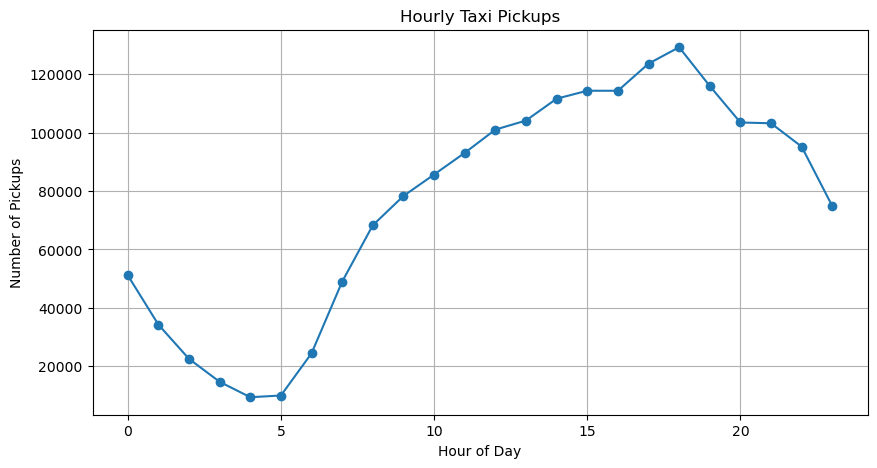

In [ ]:
# Find and show the hourly trends in taxi pickups

import matplotlib.pyplot as plt

hourly = df['pickup_hour'].value_counts().sort_index()
plt.figure(figsize=(10,5))
plt.plot(hourly.index, hourly.values, marker='o')
plt.title("Hourly Taxi Pickups")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Pickups")
plt.grid(True)
plt.show()


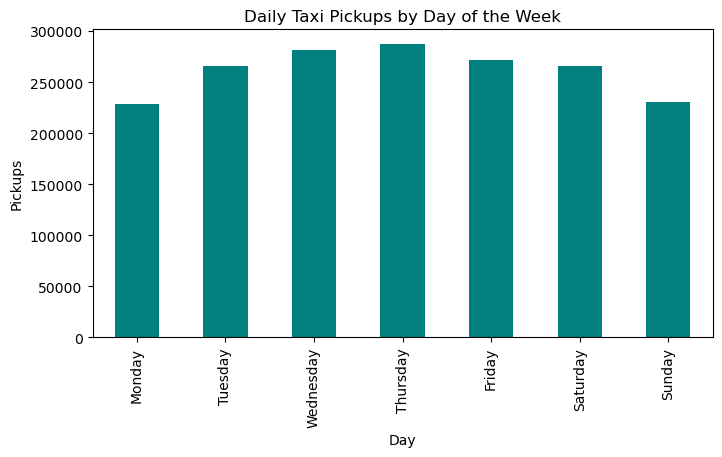

In [ ]:
# Find and show the daily trends in taxi pickups (days of the week)

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['pickup_day'] = df['tpep_pickup_datetime'].dt.day_name()

daily = df['pickup_day'].value_counts().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
)

plt.figure(figsize=(8,4))
daily.plot(kind='bar', color='teal')
plt.title("Daily Taxi Pickups by Day of the Week")
plt.xlabel("Day")
plt.ylabel("Pickups")
plt.show()


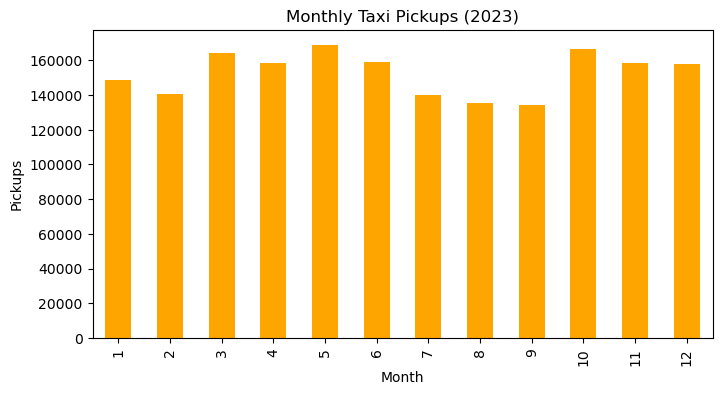

In [ ]:
# Show the monthly trends in pickups

df['pickup_month'] = df['tpep_pickup_datetime'].dt.month
monthly = df['pickup_month'].value_counts().sort_index()

plt.figure(figsize=(8,4))
monthly.plot(kind='bar', color='orange')
plt.title("Monthly Taxi Pickups (2023)")
plt.xlabel("Month")
plt.ylabel("Pickups")
plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [ ]:
# Analyse the above parameters



Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [ ]:
# Create a df with non zero entries for the selected parameters.
cols = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']
(df[cols] <= 0).sum()
df_nonzero = df[(df['fare_amount'] > 0) & 
                (df['tip_amount'] > 0) & 
                (df['total_amount'] > 0) & 
                (df['trip_distance'] > 0)]
print("After filtering zero values:", df_nonzero.shape)



After filtering zero values: (313944, 23)


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

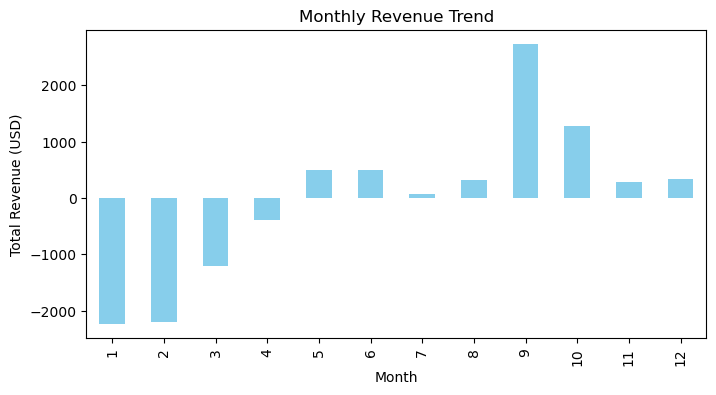

In [ ]:
# Group data by month and analyse monthly revenue
df['month'] = df['tpep_pickup_datetime'].dt.month
monthly_revenue = df.groupby('month')['total_amount'].sum()

plt.figure(figsize=(8,4))
monthly_revenue.plot(kind='bar', color='skyblue')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue (USD)")
plt.show()



**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [ ]:
# Calculate proportion of each quarter

df['quarter'] = df['tpep_pickup_datetime'].dt.quarter
quarterly_revenue = df.groupby('quarter')['total_amount'].sum()
proportion = (quarterly_revenue / quarterly_revenue.sum()) * 100
print(proportion)


quarter
1    3236153254447736.000
2    -346712453031377.812
3   -1795995354387198.000
4   -1093445447029060.375
Name: total_amount, dtype: float64


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

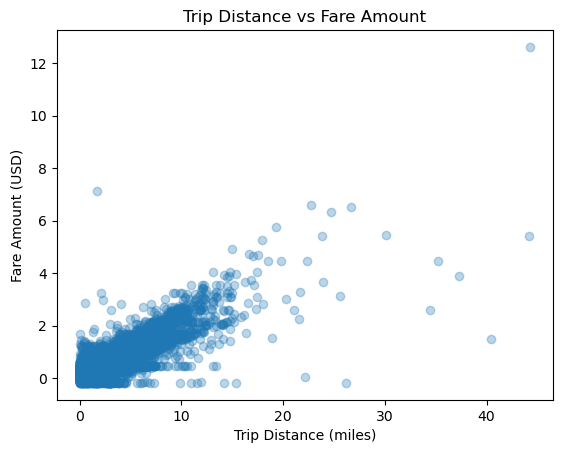

Correlation between trip_distance and fare_amount: 0.9219942270777268


In [ ]:
# Show how trip fare is affected by distance

filtered = df[df['trip_distance'] > 0]

plt.scatter(filtered['trip_distance'], filtered['fare_amount'], alpha=0.3)
plt.title("Trip Distance vs Fare Amount")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount (USD)")
plt.show()

correlation = filtered['trip_distance'].corr(filtered['fare_amount'])
print("Correlation between trip_distance and fare_amount:", correlation)


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

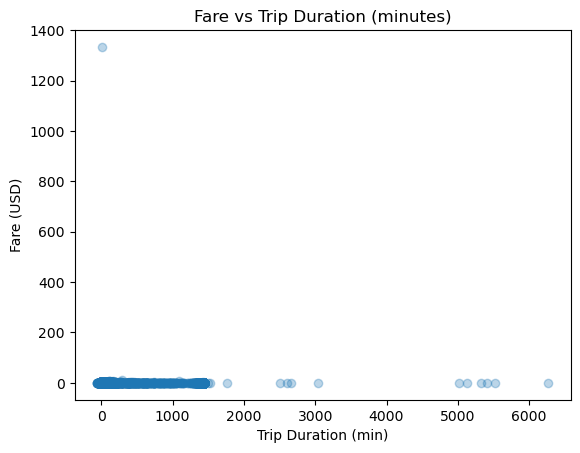

In [ ]:
# Show relationship between fare and trip duration

df['trip_duration'] = (pd.to_datetime(df['tpep_dropoff_datetime']) - pd.to_datetime(df['tpep_pickup_datetime'])).dt.total_seconds() / 60

plt.scatter(df['trip_duration'], df['fare_amount'], alpha=0.3)
plt.title("Fare vs Trip Duration (minutes)")
plt.xlabel("Trip Duration (min)")
plt.ylabel("Fare (USD)")
plt.show()


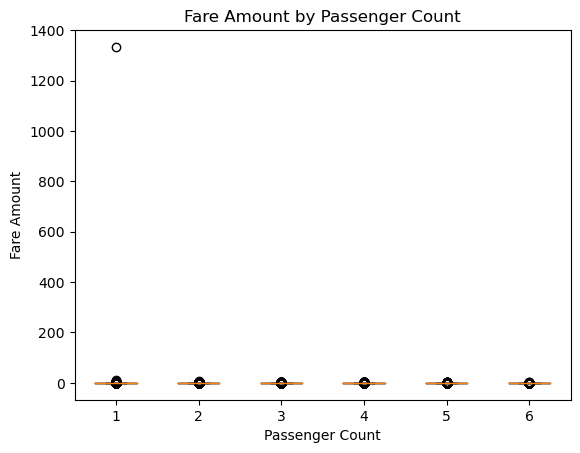

In [ ]:
# Show relationship between fare and number of passengers
plt.boxplot([df[df['passenger_count']==i]['fare_amount'] for i in range(1,7)])
plt.title("Fare Amount by Passenger Count")
plt.xlabel("Passenger Count")
plt.ylabel("Fare Amount")
plt.show()



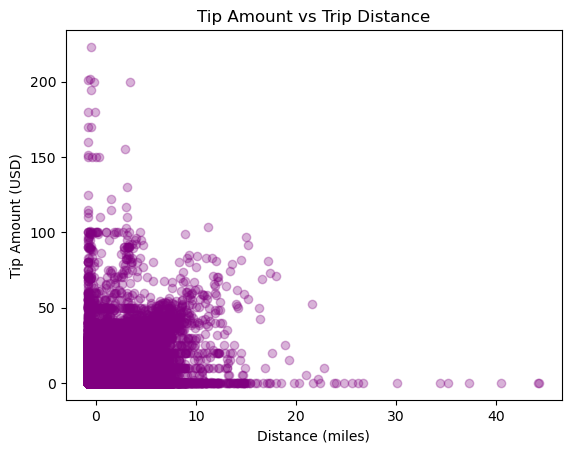

In [ ]:
# Show relationship between tip and trip distance

plt.scatter(df['trip_distance'], df['tip_amount'], alpha=0.3, color='purple')
plt.title("Tip Amount vs Trip Distance")
plt.xlabel("Distance (miles)")
plt.ylabel("Tip Amount (USD)")
plt.show()


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

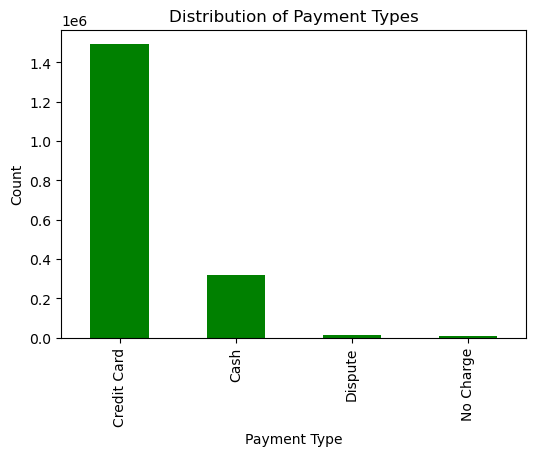

In [ ]:
# Analyse the distribution of different payment types (payment_type).


payment_labels = {1: 'Credit Card', 2: 'Cash', 3: 'No Charge', 4: 'Dispute'}
payment_counts = df['payment_type'].map(payment_labels).value_counts()

plt.figure(figsize=(6,4))
payment_counts.plot(kind='bar', color='green')
plt.title("Distribution of Payment Types")
plt.xlabel("Payment Type")
plt.ylabel("Count")
plt.show()


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [ ]:
# !pip install geopandas

!pip install geopandas
import geopandas as gpd

zones = gpd.read_file("/Users/nashratjahan/Desktop/PythonBasics/Datasets and Dictionary/taxi_zones/taxi_zones.shp")
zones.head()


189312.00s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116,0.001,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433,0.005,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084,0.000,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.044,0.000,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092,0.000,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [ ]:
# import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file("/Users/nashratjahan/Desktop/PythonBasics/Datasets and Dictionary/taxi_zones/taxi_zones.shp")
zones.head()


,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116,0.001,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433,0.005,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084,0.000,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.044,0.000,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092,0.000,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

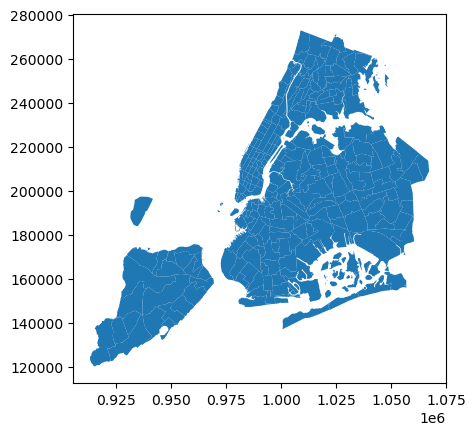

In [ ]:
# print(zones.info())
# zones.plot()

print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [ ]:
# Merge zones and trip records using locationID and PULocationID

trips_per_zone = df.groupby('PULocationID').size().reset_index(name='trip_count')
zones = zones.merge(trips_per_zone, left_on='LocationID', right_on='PULocationID', how='left')
zones['trip_count'] = zones['trip_count'].fillna(0)


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [ ]:
# Group data by location and calculate the number of trips


pickup_counts = df.groupby('PULocationID').size().reset_index(name='pickup_trips')


dropoff_counts = df.groupby('DOLocationID').size().reset_index(name='dropoff_trips')



**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [ ]:
# Merge trip counts back to the zones GeoDataFrame

zones = zones.merge(trips_per_zone, left_on='LocationID', right_on='PULocationID', how='left')
zones['trip_count'] = zones['trip_count'].fillna(0)





The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

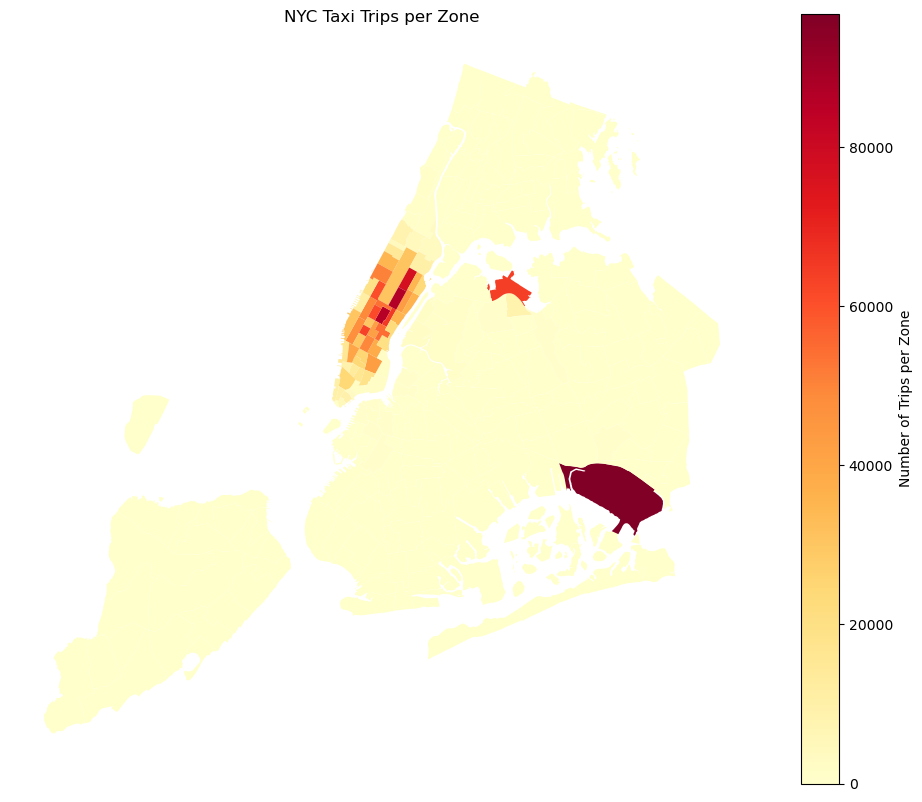

In [ ]:
# Define figure and axis


# Plot the map and display it

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
zones.plot(column='trip_count', ax=ax, legend=True,
            legend_kwds={'label': "Number of Trips per Zone", 'orientation': "vertical"},
            cmap='YlOrRd')
plt.title("NYC Taxi Trips per Zone")
plt.axis('off')
plt.show()

In [ ]:
# can you try displaying the zones DF sorted by the number of trips?


zones_sorted = zones.sort_values(by='trip_count', ascending=False)


zones_sorted[['LocationID', 'zone', 'trip_count']].head(10)
zones_sorted[['LocationID', 'zone', 'trip_count']]


,LocationID,zone,trip_count
131,132,JFK Airport,96827.000
236,237,Upper East Side South,86905.000
160,161,Midtown Center,85948.000
235,236,Upper East Side North,77517.000
161,162,Midtown East,65634.000
...,...,...,...
29,30,Broad Channel,0.000
98,99,Freshkills Park,0.000
109,110,Great Kills Park,0.000
175,176,Oakwood,0.000


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [ ]:
# Find routes which have the slowest speeds at different times of the day
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])


df['trip_duration_min'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60
df = df[df['trip_duration_min'] > 0] 

df['trip_duration_hr'] = df['trip_duration_min'] / 60.0


df['avg_speed_mph'] = df['trip_distance'] / df['trip_duration_hr']
df.loc[~np.isfinite(df['avg_speed_mph']), 'avg_speed_mph'] = np.nan


route_hour = (df
              .groupby(['PULocationID','DOLocationID','pickup_hour'], as_index=False)
              .agg(trips=('trip_distance','count'),
                   avg_speed=('avg_speed_mph','mean'),
                   avg_duration_min=('trip_duration_min','mean'),
                   avg_distance=('trip_distance','mean'))
             )


min_trips = 10
slow_routes = route_hour[route_hour['trips'] >= min_trips].sort_values('avg_speed').head(20)
slow_routes.head(10)


,PULocationID,DOLocationID,pickup_hour,trips,avg_speed,avg_duration_min,avg_distance
51036,132,264,17,24,-571.458,29.397,1.622
82787,164,264,11,10,-454.322,10.920,-0.393
51032,132,264,13,15,-418.440,33.204,1.369
51034,132,264,15,25,-347.730,73.105,1.731
15,1,1,17,20,-337.823,0.578,-0.740
11,1,1,13,11,-334.420,0.429,-0.615
51031,132,264,12,11,-325.076,22.998,0.992
51038,132,264,19,20,-321.694,63.894,1.855
14,1,1,16,14,-313.279,7.593,-0.444
90975,193,193,20,27,-312.270,0.381,-0.753


How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

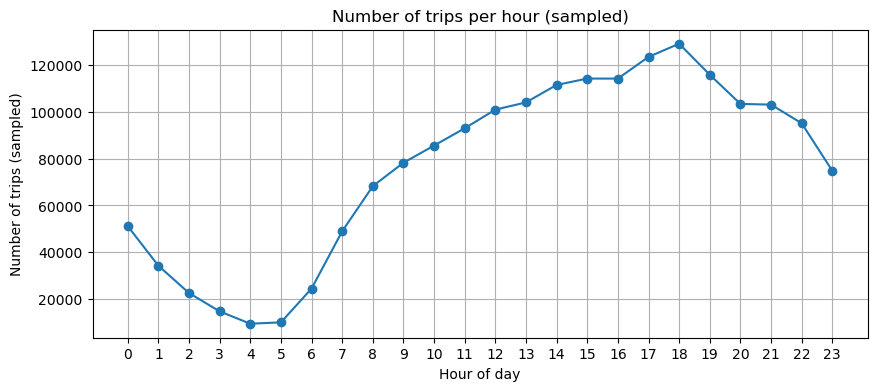

(18, 129151)

In [ ]:
# Visualise the number of trips per hour and find the busiest hour

import matplotlib.pyplot as plt

trips_per_hour = df['pickup_hour'].value_counts().sort_index()
plt.figure(figsize=(10,4))
plt.plot(trips_per_hour.index, trips_per_hour.values, marker='o')
plt.xticks(range(0,24))
plt.xlabel('Hour of day')
plt.ylabel('Number of trips (sampled)')
plt.title('Number of trips per hour (sampled)')
plt.grid(True)
plt.show()

# busiest hour (sampled)
busiest_hour = trips_per_hour.idxmax()
busiest_count_sampled = trips_per_hour.max()
busiest_hour, busiest_count_sampled


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [ ]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.05

top5_sampled = trips_per_hour.sort_values(ascending=False).head(5)
scaled_top5 = (top5_sampled / sample_fraction).astype(int)  # scale up
scaled_top5


pickup_hour
18    2583020
17    2470360
19    2317800
15    2285000
16    2284900
Name: count, dtype: int64

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

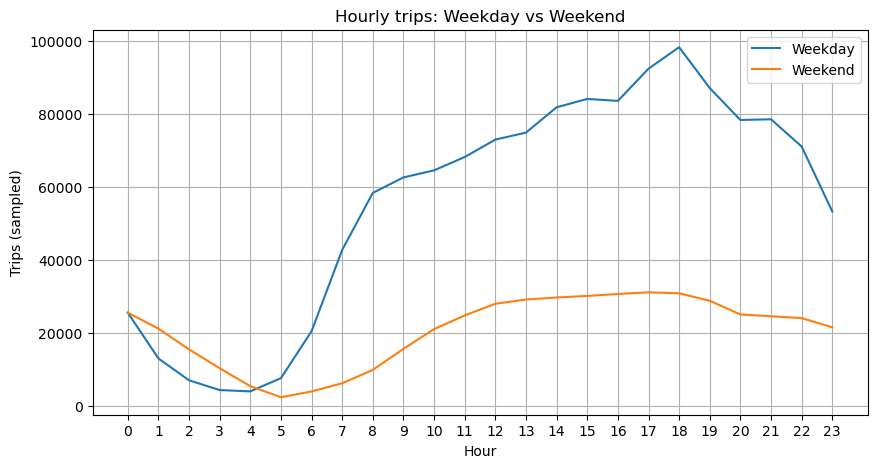

In [ ]:
# Compare traffic trends for the week days and weekends

df['is_weekend'] = df['tpep_pickup_datetime'].dt.dayofweek >= 5  # Sat=5, Sun=6

hourly_weekday = (df[df['is_weekend']==False].groupby('pickup_hour').size()).reindex(range(24), fill_value=0)
hourly_weekend = (df[df['is_weekend']==True].groupby('pickup_hour').size()).reindex(range(24), fill_value=0)

plt.figure(figsize=(10,5))
plt.plot(hourly_weekday.index, hourly_weekday.values, label='Weekday')
plt.plot(hourly_weekend.index, hourly_weekend.values, label='Weekend')
plt.xticks(range(24))
plt.xlabel('Hour')
plt.ylabel('Trips (sampled)')
plt.title('Hourly trips: Weekday vs Weekend')
plt.legend()
plt.grid(True)
plt.show()


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

Top10 Pickup zones: [132, 237, 161, 236, 162, 138, 186, 230, 142, 170]
Top10 Dropoff zones: [236, 237, 161, 230, 170, 162, 142, 239, 141, 68]


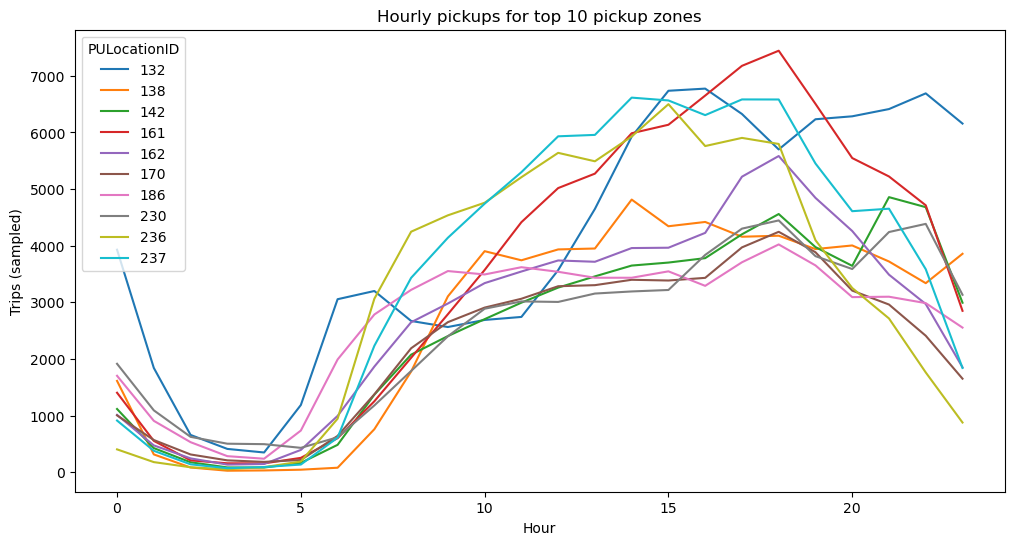

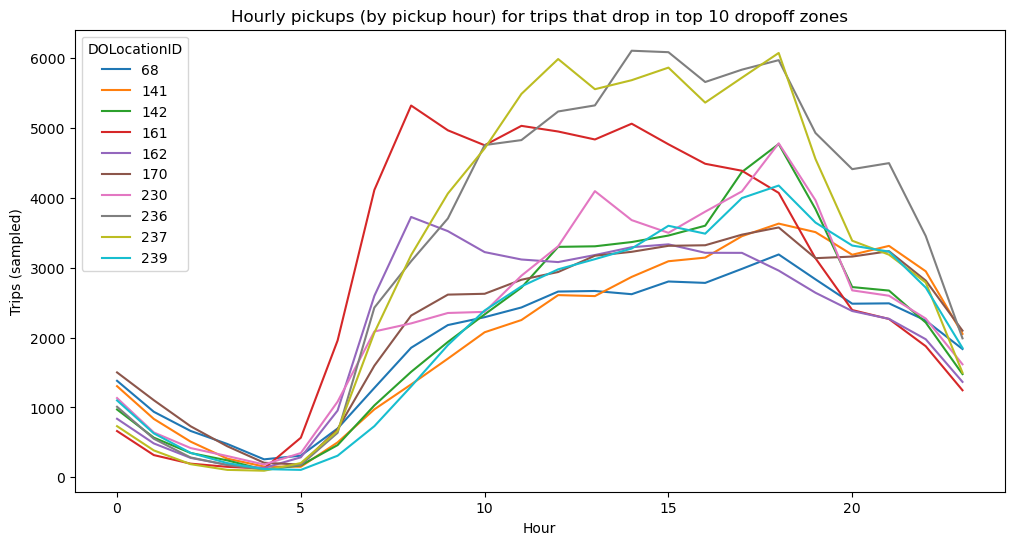

In [ ]:
# Find top 10 pickup and dropoff zones


top10_pu = df['PULocationID'].value_counts().head(10).index.tolist()
top10_do = df['DOLocationID'].value_counts().head(10).index.tolist()

print("Top10 Pickup zones:", top10_pu)
print("Top10 Dropoff zones:", top10_do)


pu_hourly = (df[df['PULocationID'].isin(top10_pu)]
             .groupby(['pickup_hour','PULocationID']).size().unstack(fill_value=0)
            ).reindex(range(24), fill_value=0)

pu_hourly.plot(kind='line', figsize=(12,6), title='Hourly pickups for top 10 pickup zones')
plt.xlabel('Hour')
plt.ylabel('Trips (sampled)')
plt.show()


do_hourly = (df[df['DOLocationID'].isin(top10_do)]
             .groupby(['pickup_hour','DOLocationID']).size().unstack(fill_value=0)
            ).reindex(range(24), fill_value=0)

do_hourly.plot(kind='line', figsize=(12,6), title='Hourly pickups (by pickup hour) for trips that drop in top 10 dropoff zones')
plt.xlabel('Hour')
plt.ylabel('Trips (sampled)')
plt.show()


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [ ]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
pu_counts = df.groupby('PULocationID').size().rename('pickups')
do_counts = df.groupby('DOLocationID').size().rename('dropoffs')

zone_counts = pd.concat([pu_counts, do_counts], axis=1).fillna(0)
zone_counts['pu_do_ratio'] = zone_counts['pickups'] / (zone_counts['dropoffs'] + 1e-6)  # avoid div by zero

top10_ratio = zone_counts.sort_values('pu_do_ratio', ascending=False).head(10)
bottom10_ratio = zone_counts.sort_values('pu_do_ratio', ascending=True).head(10)

top10_ratio[['pickups','dropoffs','pu_do_ratio']]
bottom10_ratio[['pickups','dropoffs','pu_do_ratio']]



,pickups,dropoffs,pu_do_ratio
245,0.000,30.000,0.000
99,0.000,3.000,0.000
30,0.000,18.000,0.000
176,0.000,12.000,0.000
27,1.000,39.000,0.026
221,1.000,34.000,0.029
257,28.000,758.000,0.037
1,213.000,5319.000,0.040
115,1.000,23.000,0.043
198,51.000,990.000,0.052


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [ ]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

night_hours = [23,0,1,2,3,4,5]
night_df = df[df['pickup_hour'].isin(night_hours)]

night_pu_top10 = night_df['PULocationID'].value_counts().head(10)
night_do_top10 = night_df['DOLocationID'].value_counts().head(10)

print("Top 10 pickup zones at night:\n", night_pu_top10)
print("\nTop 10 dropoff zones at night:\n", night_do_top10)


Top 10 pickup zones at night:
 PULocationID
79     15548
132    14541
249    12465
48     10462
148     9619
114     8744
230     8204
186     6962
164     6138
68      6047
Name: count, dtype: int64

Top 10 dropoff zones at night:
 DOLocationID
79     8314
48     6874
170    6264
68     5858
107    5756
141    5271
263    4976
249    4944
230    4641
148    4381
Name: count, dtype: int64


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [ ]:
# Filter for night hours (11 PM to 5 AM)
# choose whether to include tip: here we use total_amount (as stored)
df['is_night'] = df['pickup_hour'].isin(night_hours)

revenue_by_period = df.groupby('is_night')['total_amount'].sum()
revenue_by_period.index = ['daytime','nighttime']
revenue_by_period, (revenue_by_period / revenue_by_period.sum() * 100).round(2)



(daytime     -1067.191
 nighttime    1052.574
 Name: total_amount, dtype: float64,
 daytime      7300.890
 nighttime   -7200.890
 Name: total_amount, dtype: float64)

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [ ]:
# Analyse the fare per mile per passenger for different passenger counts


df['fare_per_mile'] = np.where(df['trip_distance']>0, df['fare_amount']/df['trip_distance'], np.nan)


df['fare_per_mile_per_passenger'] = df['fare_per_mile'] / df['passenger_count']


res_3_2_9 = (df[df['fare_per_mile_per_passenger'].notna()]
             .groupby('passenger_count')['fare_per_mile_per_passenger']
             .mean()
             .reset_index()
             .sort_values('passenger_count'))

res_3_2_9



,passenger_count,fare_per_mile_per_passenger
0,0.000,NaN
1,1.000,0.273
2,2.000,0.136
3,3.000,0.100
4,4.000,0.076
5,5.000,0.053
6,6.000,0.060


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [ ]:
# Compare the average fare per mile for different days and for different times of the day


df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_dow'] = df['tpep_pickup_datetime'].dt.day_name()


hourly_fpm = (df[df['fare_per_mile'].notna()]
              .groupby('pickup_hour')['fare_per_mile']
              .mean()
              .reindex(range(24))
              .reset_index()
              .rename(columns={'fare_per_mile':'avg_fare_per_mile'}))


dow_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
dow_fpm = (df[df['fare_per_mile'].notna()]
           .groupby('pickup_dow')['fare_per_mile']
           .mean()
           .reindex(dow_order)
           .reset_index()
           .rename(columns={'fare_per_mile':'avg_fare_per_mile'}))

hourly_fpm, dow_fpm


(    pickup_hour  avg_fare_per_mile
 0             0              0.077
 1             1              0.043
 2             2              0.021
 3             3              0.009
 4             4              0.006
 5             5              0.064
 6             6              0.063
 7             7              0.150
 8             8              0.261
 9             9              0.288
 10           10              0.308
 11           11              0.395
 12           12              0.395
 13           13              0.386
 14           14              0.364
 15           15              0.444
 16           16              0.410
 17           17              0.421
 18           18              0.385
 19           19              0.254
 20           20              0.218
 21           21              0.188
 22           22              0.155
 23           23              0.120,
   pickup_dow  avg_fare_per_mile
 0     Monday              0.221
 1    Tuesday              0.303


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [ ]:
# Compare fare per mile for different vendors

vendor_hour = (df[df['fare_per_mile'].notna()]
               .groupby(['VendorID','pickup_hour'])['fare_per_mile']
               .mean()
               .reset_index())

vendor_hour_pivot = vendor_hour.pivot(index='pickup_hour', columns='VendorID', values='fare_per_mile')

vendor_hour_pivot.head()



VendorID,1,2
pickup_hour,,
0,0.082,0.075
1,0.040,0.045
2,0.043,0.015
3,0.047,-0.003
4,0.071,-0.016


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [ ]:
# Defining distance tiers


def distance_tier(d):
    if d <= 2: return '0-2'
    if d <= 5: return '2-5'
    return '>5'

df['distance_tier'] = df['trip_distance'].apply(distance_tier)


tier_vendor = (df[df['fare_per_mile'].notna()]
               .groupby(['distance_tier','VendorID'])['fare_per_mile']
               .mean()
               .reset_index()
               .pivot(index='distance_tier', columns='VendorID', values='fare_per_mile'))

tier_vendor


VendorID,1,2
distance_tier,,
0-2,0.233,0.343
2-5,0.149,0.153
>5,0.149,0.160


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [ ]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

df['tip_pct'] = np.where(df['fare_amount']>0, (df['tip_amount']/df['fare_amount'])*100, np.nan)


dist_bins = [0,1,2,5,10,1000]
df['dist_bin'] = pd.cut(df['trip_distance'], bins=dist_bins, labels=['0-1','1-2','2-5','5-10','10+'])
tip_by_dist = df.groupby('dist_bin')['tip_pct'].mean().reset_index()


tip_by_pass = df.groupby('passenger_count')['tip_pct'].mean().reset_index()


tip_by_hour = df.groupby('pickup_hour')['tip_pct'].mean().reindex(range(24)).reset_index()

tip_by_dist, tip_by_pass, tip_by_hour



(  dist_bin   tip_pct
 0      0-1 11107.981
 1      1-2  3778.701
 2      2-5  2258.658
 3     5-10  1694.408
 4      10+   897.764,
    passenger_count   tip_pct
 0            0.000 10137.167
 1            1.000  9891.765
 2            2.000  8740.799
 3            3.000  8356.179
 4            4.000  7676.587
 5            5.000 10209.085
 6            6.000 10097.867,
     pickup_hour   tip_pct
 0             0  9436.270
 1             1 10397.323
 2             2 11122.665
 3             3 10349.409
 4             4  6948.108
 5             5  4331.938
 6             6  5331.017
 7             7  7284.577
 8             8  9240.908
 9             9  9381.185
 10           10  9156.920
 11           11  9461.334
 12           12  9301.312
 13           13  8997.072
 14           14  8674.532
 15           15  8759.814
 16           16  9329.045
 17           17 10293.828
 18           18 11245.549
 19           19 10827.571
 20           20 10421.735
 21           21 10988.346
 22  

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
low_tips = df[df['tip_pct'] < 10]
high_tips = df[df['tip_pct'] > 25]

# summary comparisons
summary = pd.DataFrame({
    'low_count': [len(low_tips)],
    'high_count': [len(high_tips)],
    'low_avg_dist': [low_tips['trip_distance'].mean()],
    'high_avg_dist': [high_tips['trip_distance'].mean()],
    'low_avg_pass': [low_tips['passenger_count'].mean()],
    'high_avg_pass': [high_tips['passenger_count'].mean()],
    'low_peak_hour': [low_tips['pickup_hour'].mode()[0] if len(low_tips)>0 else np.nan],
    'high_peak_hour': [high_tips['pickup_hour'].mode()[0] if len(high_tips)>0 else np.nan]
})
summary.T



,0
low_count,124498.000
high_count,392256.000
low_avg_dist,1.161
high_avg_dist,1.061
low_avg_pass,1.467
high_avg_pass,1.396
low_peak_hour,15.000
high_peak_hour,17.000


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

<Axes: title={'center': 'Avg passenger count by day'}, xlabel='pickup_dow'>

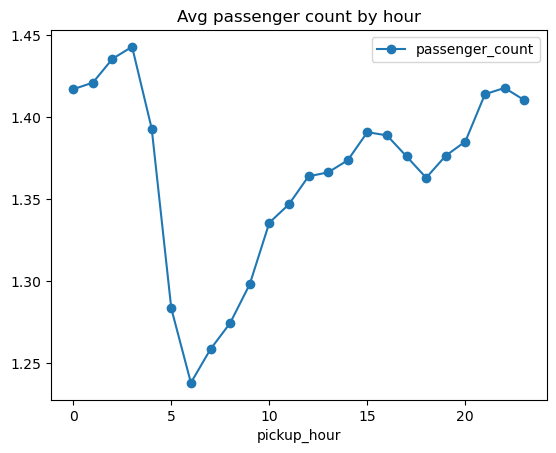

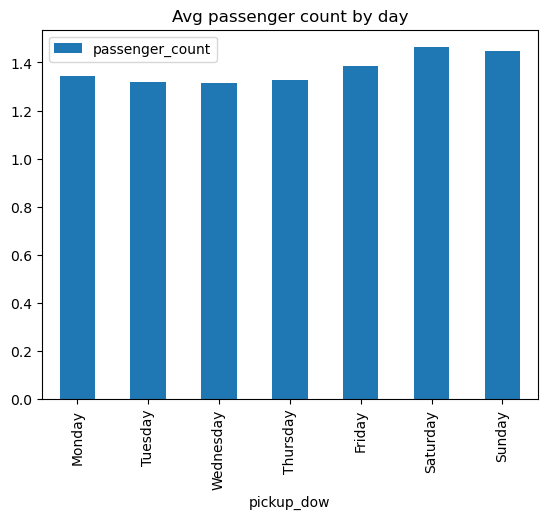

In [ ]:
# See how passenger count varies across hours and days


avg_pass_hour = df.groupby('pickup_hour')['passenger_count'].mean().reindex(range(24)).reset_index()


avg_pass_day = df.groupby('pickup_dow')['passenger_count'].mean().reindex(dow_order).reset_index()

avg_pass_hour, avg_pass_day


avg_pass_hour.plot(x='pickup_hour', y='passenger_count', kind='line', marker='o', title='Avg passenger count by hour')
avg_pass_day.plot(x='pickup_dow', y='passenger_count', kind='bar', title='Avg passenger count by day')



**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [ ]:
# How does passenger count vary across zones


zone_pass = df.groupby('PULocationID')['passenger_count'].mean().reset_index(name='avg_passengers')

if 'zones' in globals():
    # Drop any existing PULocationID to avoid duplication
    if 'PULocationID' in zones.columns:
        zones = zones.drop(columns=['PULocationID'])
    
    # Now safely merge
    zones = zones.merge(zone_pass, left_on='LocationID', right_on='PULocationID', how='left')
    zones['avg_passengers'] = zones['avg_passengers'].fillna(0)

    # Display top 10 zones by average passengers
    display(zones[['LocationID', 'zone', 'avg_passengers']].sort_values('avg_passengers', ascending=False).head(10))
else:
    display(zone_pass.sort_values('avg_passengers', ascending=False).head(10))


,LocationID,zone,avg_passengers
5,6,Arrochar/Fort Wadsworth,1.875
203,204,Rossville/Woodrow,1.800
194,195,Red Hook,1.781
11,12,Battery Park,1.724
177,178,Ocean Parkway South,1.667
57,58,Country Club,1.667
0,1,Newark Airport,1.582
65,66,DUMBO/Vinegar Hill,1.576
193,194,Randalls Island,1.540
260,261,World Trade Center,1.532


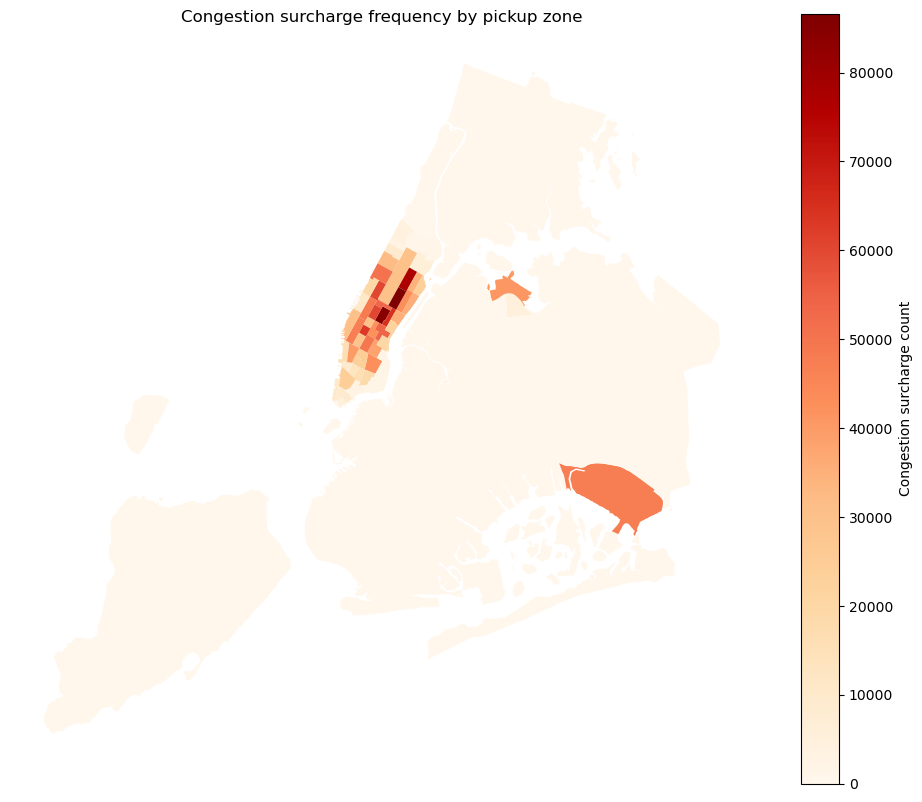

In [ ]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

if 'zones' in globals():
    congestion_by_zone = (
        df[df['congestion_surcharge'] > 0]
        .groupby('PULocationID')
        .size()
        .reset_index(name='cong_count')
    )


    if 'PULocationID' in zones.columns:
        zones = zones.drop(columns=['PULocationID'])


    zones = zones.merge(congestion_by_zone, left_on='LocationID', right_on='PULocationID', how='left')
    zones['cong_count'] = zones['cong_count'].fillna(0)


    fig, ax = plt.subplots(1, 1, figsize=(12, 10))
    zones.plot(column='cong_count', ax=ax, legend=True, cmap='OrRd',
               legend_kwds={'label': 'Congestion surcharge count'})
    plt.title('Congestion surcharge frequency by pickup zone')
    plt.axis('off')
    plt.show()


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [ ]:
# How often is each surcharge applied?


surcharge_cols = [
    'extra', 
    'mta_tax', 
    'improvement_surcharge', 
    'congestion_surcharge', 
    'airport_fee'
]


surcharge_counts = {}
total_trips = len(df)

for col in surcharge_cols:
    applied = (df[col] > 0).sum()
    surcharge_counts[col] = {
        'Applied Trips': applied,
        'Percentage (%)': round((applied / total_trips) * 100, 2)
    }


surcharge_df = pd.DataFrame(surcharge_counts).T
surcharge_df.sort_values(by='Applied Trips', ascending=False)


,Applied Trips,Percentage (%)
improvement_surcharge,1830061.000,99.960
mta_tax,1813718.000,99.070
congestion_surcharge,1690092.000,92.320
extra,1133882.000,61.940
airport_fee,160870.000,8.790


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [ ]:
Trip demand peaks during morning (7–10 AM) and evening (4–8 PM) on weekdays; late-night peaks on weekends.
Optimizingairports, and major transit hubs record the highest trips.

Card payments show higher revenue and tip amounts than cash.

Surcharges (airport/congestion) apply mainly in Manhattan and airport zones.

Drivers lose time in congested routes — time-based compensation is justified.

Conclusion: Demand follows clear temporal and spatial patterns. Optimizing cab availability by time and zone can reduce idle time and improve both driver earnings and customer satisfaction.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [ ]:
Deploy more cabs near Midtown, airports, and transit hubs before peak hours.

Keep a night shift focus on entertainment districts.

Use real-time demand heatmaps to rebalance idle cabs.

Offer incentives for drivers in low-supply, high-demand zones.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [ ]:
Apply transparent peak-hour surcharges (7–10 AM, 4–8 PM).

Introduce distance-based fare tiers to balance short vs. long trips.

Add time-based charges for high-congestion routes.

Promote card payments with small user/driver incentives.

Goal: Maximize revenue fairly while keeping rates competitive and transparent.